In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mh_df = pd.read_csv('data/cleaned_data/mh_cleaned.csv')
gs_df = pd.read_csv("data/cleaned_data/greenspace_cleaned.csv")

df = pd.read_csv("data/cleaned_data/merged_cleaned_data.csv")

In [7]:
df.shape

(137, 43)

In [8]:
df.head()

,Unnamed: 0,MH_Population,MH_Score,UC_Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,...,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division,PopulationDelta,PopDensity_MH,PopDensity_GS
0,1,99553,15.000000,2,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,...,CA,Santa Maria,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific,93637.93791,2023.651685,971.540023
1,2,88410,11.100000,4,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,...,CA,Santa Barbara,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific,76532.32110,1586.268293,964.054300
2,3,150441,14.700000,6,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,...,CA,Salinas,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Salinas,West,Pacific,61865.95980,1336.129870,934.402858
3,4,197899,13.600000,7,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,...,CA,Oxnard,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Oxnard; Ventura,West,Pacific,33285.93555,2010.400000,1270.712543
4,5,3294906,9.992308,9,1717.0,37.327115,-121.933299,41.404357,354.375004,15.534866,...,CA,San Jose,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,San Jose; San Francisco; Oakland; Fremont; Sun...,West,Pacific,168736.21400,4863.766667,2051.496433


In [9]:
categorical_df = df.select_dtypes(include=['object', 'category'])

categorical_df.head()

,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division
0,CA,Santa Maria,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific
1,CA,Santa Barbara,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific
2,CA,Salinas,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Salinas,West,Pacific
3,CA,Oxnard,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Oxnard; Ventura,West,Pacific
4,CA,San Jose,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,San Jose; San Francisco; Oakland; Fremont; Sun...,West,Pacific


In [16]:
non_categorical_df = df.select_dtypes(exclude=['object', 'category'])
non_categorical_df.drop(columns=['UC_Grouping','Unnamed: 0'], inplace=True)
non_categorical_df.head()

,MH_Population,MH_Score,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,Avg Greenness,Total Green Area,...,Particulate Matter Emissions Transport,Particulate Matter Emissions Agriculture,Total Concertation of Particulate Matter,% of Pop in High Green Area,% of Open Spaces,Land Use Efficiency,Max Magnitude of Heatwaves,PopulationDelta,PopDensity_MH,PopDensity_GS
0,99553,15.000000,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,0.312846,54.450694,...,3.014213,0.047215,11.6309,0.040129,23.64,0.481144,2.79174,93637.93791,2023.651685,971.540023
1,88410,11.100000,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,0.362785,59.576284,...,3.263458,0.013192,13.8037,0.061348,36.50,0.556762,4.25502,76532.32110,1586.268293,964.054300
2,150441,14.700000,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,0.339631,53.886276,...,6.895041,0.059792,12.3763,0.076114,24.61,0.843804,11.39150,61865.95980,1336.129870,934.402858
3,197899,13.600000,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,0.299903,135.224578,...,16.894830,0.072824,17.0109,0.036199,28.65,0.435584,NaN,33285.93555,2010.400000,1270.712543
4,3294906,9.992308,1717.0,37.327115,-121.933299,41.404357,354.375004,15.534866,0.306727,1713.386499,...,388.799335,0.561288,11.9947,0.042397,23.88,0.271644,3.80059,168736.21400,4863.766667,2051.496433


(array([ 6., 10., 16., 29., 17., 23., 19.,  8.,  4.,  5.]),
 array([ 8.7 ,  9.66, 10.62, 11.58, 12.54, 13.5 , 14.46, 15.42, 16.38,
        17.34, 18.3 ]),
 <BarContainer object of 10 artists>)

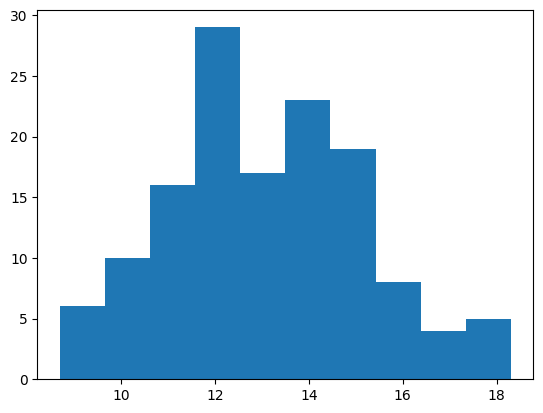

In [13]:
plt.hist(x = df['MH_Score'])

#seems to follow normal distribution